# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Team Mate name : Jayesh Parsnani

ID: 1001964955

Student Full Name: Gaurav Taneja

ID:1001955801

In [1]:
# References used:
# 1. For data processing: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# 2. To determine value of k by SSE: https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/
# 3. For Train and Test the data: Last Assignment.
# 4. Model and fit the data to the PCA model: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# 5. Create the KMeans model : # https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
# 6. Compute cluster centers and predict cluster index for each sample : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# 7. Confusion Matric : https://datatofish.com/confusion-matrix-python/
# 8. for 2-a: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
# 9. Pairwise Distances: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

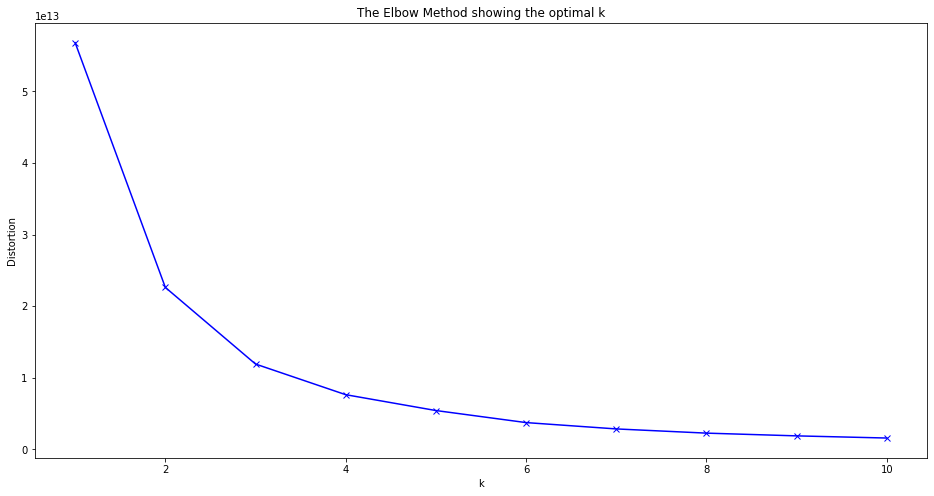

Since the elbow bends at 2, it is the best value of k.


In [4]:
df = pd.read_csv("clusteringdata.csv")

#########################begin code for Task 1-a
# Using labelencoder for converting into a suitable datatype for the model.
d= list(df.select_dtypes(include=['category','object']))
label_encoder = preprocessing.LabelEncoder()
for i in d:
	df[i] = label_encoder.fit_transform(df[i])
df= df.astype(float)
dataset = df.values.tolist()

# Replacing non-infinite values to suitable form.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

# Calculating SSE for each value of k and storing in list. SSE is divided by 10000000 for ease of plotting graph
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


print("Since the elbow bends at 2, it is the best value of k.")


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [5]:
from sklearn.model_selection import train_test_split
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
# Assigning values for the target variable <=50:1 and >50K:0
df['label'] = df['Class'].apply(lambda x: 0 if x == ">50K" else 1)
df = df.drop('Class',axis =1)
xtrain,xtest,ytrain,ytest= train_test_split(df.drop(columns='label'),df.label,train_size=0.7,test_size=0.3,random_state=2022)
print('Train rows and columns',xtrain.shape)
print('Test rows and columns',xtest.shape)
print('Train class rows and columns',ytrain.shape)
print('Test class rows and columns',ytest.shape)

###################end code for Task 1-b-1

Train rows and columns (3500, 14)
Test rows and columns (1500, 14)
Train class rows and columns (3500,)
Test class rows and columns (1500,)


The Cluster Centers: [[-4.97842211e+04  6.98413725e+01]
 [ 1.33824603e+05 -1.87740086e+02]]


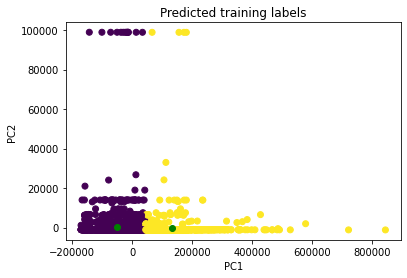

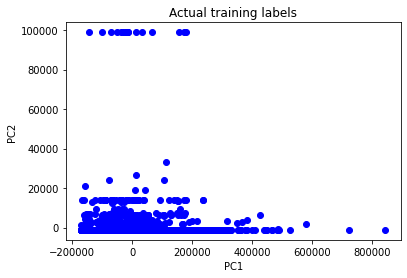

In [6]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA

# Model and fit the data to the PCA model
pca = PCA(2)
X_train_pca = pca.fit_transform(xtrain)

# Create the KMeans model
k_means_Train = KMeans(n_clusters=2,random_state=2022)

# Compute cluster centers and predict cluster index for each sample 
k_means_TrainFit = k_means_Train.fit(X_train_pca)
train_labels = k_means_TrainFit.predict(X_train_pca)
centers = k_means_Train.cluster_centers_
print("The Cluster Centers:",centers)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.scatter(x=x, y=y, c=train_labels)
plt.scatter(centers[0][0],centers[0][1],c='green')
plt.scatter(centers[1][0],centers[1][1],c='green')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()

plt.scatter(x=x, y=y, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show()


###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

cluster centers: [[-4.97842211e+04  6.98413725e+01]
 [ 1.33824603e+05 -1.87740086e+02]]


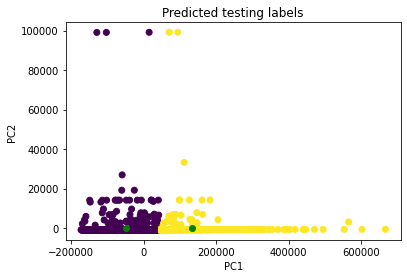

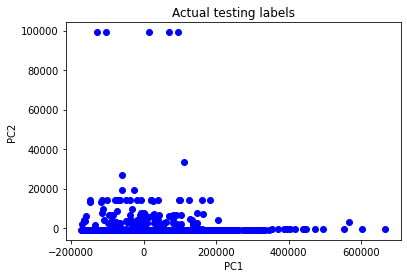

In [7]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
# Model and fit the data to the PCA model
pca = PCA(2)
X_test_pca = pca.fit_transform(xtest)

# predict cluster index for each sample 
test_labels = k_means_Train.predict(X_test_pca)
centers = k_means_Train.cluster_centers_
print("cluster centers:",centers)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
# for i in range(0, len(test_labels)):
plt.scatter(x=x,y=y, c=test_labels)
plt.scatter(centers[0][0],centers[0][1],c='g')
plt.scatter(centers[1][0],centers[1][1],c='g')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted testing labels')
plt.show()
plt.scatter(x=x, y=y, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual testing labels')
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

[[   0    0]
 [1087  413]]
[[   0    0]
 [1087  413]]


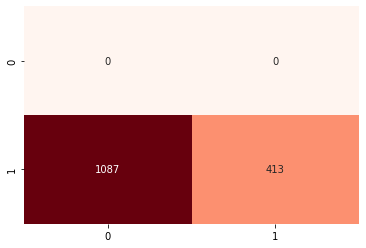

In [8]:
###################begin code for Task 1-b-4: Print out a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

y_pred = k_means_Train.predict(X_test_pca)
print(confusion_matrix(ytest, y_pred))
print(metrics.confusion_matrix(ytest, y_pred))
ConfusionMatrix = pd.DataFrame(confusion_matrix(ytest, y_pred))
sns.heatmap(ConfusionMatrix, annot = True, cmap = "Reds", fmt="d", cbar=False)
plt.show()

###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [9]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score
map = {}

## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(xtrain)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
clusters_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
cosine_cluster = clusters_cosine.fit_predict(pdm_train)
cosine_f1 = metrics.f1_score(ytrain, cosine_cluster)
map.update( {cosine_f1:'complete_cosine_clustering_fit'} )


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
clusters_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
euclidean_cluster = clusters_euclidean.fit_predict(pdm_train)
euclidean_f1 = metrics.f1_score(ytrain, euclidean_cluster)
map.update( {euclidean_f1:'complete_euclidean_clustering_fit'} )


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
clusters_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
manhattan_cluster = clusters_manhattan.fit_predict(pdm_train)
manhattan_f1 = metrics.f1_score(ytrain, manhattan_cluster)
map.update( {manhattan_f1:'complete_manhattan_clustering_fit'} )


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
clusters_cosine_avg = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
average_cosine_cluster = clusters_cosine_avg.fit_predict(pdm_train)
average_cosine_f1 = metrics.f1_score(ytrain, average_cosine_cluster)
map.update( {average_cosine_f1:'average_cosine_clustering_fit'} )


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
clusters_euclidean_avg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
average_euclidean_cluster = clusters_euclidean_avg.fit_predict(pdm_train)
average_euclidean_f1 = metrics.f1_score(ytrain, average_euclidean_cluster)
map.update( {average_euclidean_f1:'average_cosine_clustering_fit'} )


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
clusters_manhattan_avg = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
eaverage_manhattan_cluster = clusters_manhattan_avg.fit_predict(pdm_train)
average_manhattan_f1 = metrics.f1_score(ytrain, eaverage_manhattan_cluster)
map.update( {average_manhattan_f1:'average_manhattan_clustering_fit'} )


print("F1-score for complete linkage + cosine", cosine_f1)
print("F1-score for complete linkage + euclidean", euclidean_f1)
print("F1-score for complete linkage + manhattan", manhattan_f1)
print("F1-score for average linkage + cosine", average_cosine_f1)
print("F1-score for average linkage + euclidean", average_euclidean_f1)
print("F1-score for average linkage + manhattan", average_manhattan_f1)
maxValue=max(cosine_f1,euclidean_f1,manhattan_f1,average_cosine_f1,average_euclidean_f1,average_manhattan_f1)
print("\nThe best pair of linkage method and similarity measure :", maxValue, " is ", map.get(maxValue))
###################end code for Task 2-a

F1-score for complete linkage + cosine 0.5182049110922947
F1-score for complete linkage + euclidean 0.9961279219847985
F1-score for complete linkage + manhattan 0.9961279219847985
F1-score for average linkage + cosine 0.45064187693669766
F1-score for average linkage + euclidean 0.001142204454597373
F1-score for average linkage + manhattan 0.001142204454597373

The best pair of linkage method and similarity measure : 0.9961279219847985  is  complete_manhattan_clustering_fit


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

complete


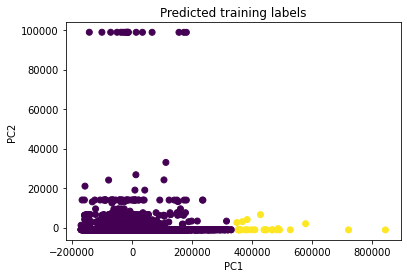

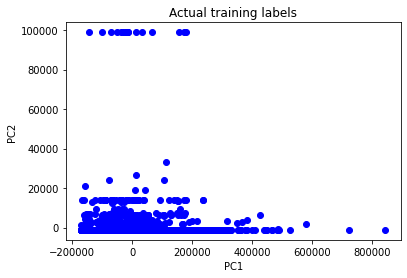

In [10]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
string = map.get(maxValue).split("_")
print(string[0])

# Visualize the predicted training labels versus actual training labels. 
HAgg_clustering = AgglomerativeClustering(n_clusters=2, affinity=string[1], linkage=string[0])  
X_train_HAgg_pca = HAgg_clustering.fit_predict(X_train_pca)

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.scatter(x=x,y=y,c=X_train_HAgg_pca)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()

plt.scatter(x=x, y=y, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show() #Representation of the plot 

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

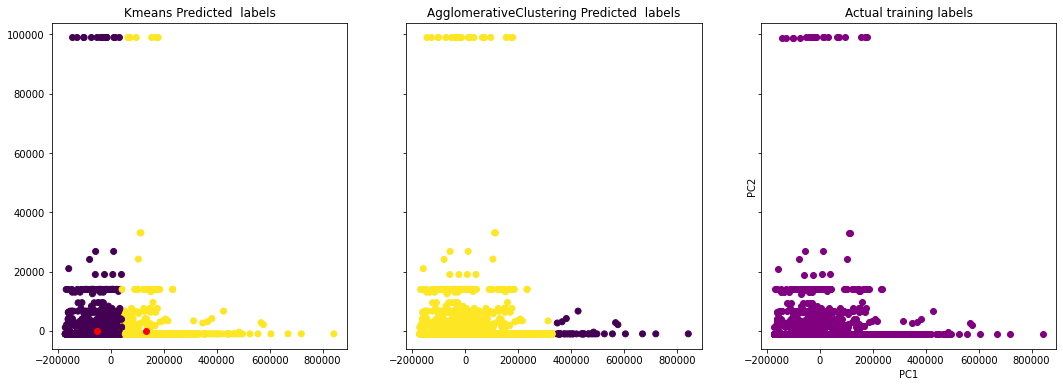

In [11]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
pca = PCA(2)

### Visualize Clusters
#  Model and fit the data to the PCA model
pca = PCA(2)
X_pca = pca.fit_transform(df)
x = X_pca[:, 0]
y = X_pca[:, 1]
kmean = KMeans(2)
clusteringlabel = kmean.fit_predict(X_pca)
cluster_center = kmean.cluster_centers_
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 6))

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
best_pdm = pairwise_distances(df)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglomerativeClustering = AgglomerativeClustering(n_clusters=2, affinity=string[1], linkage=string[0])  
agglomerativeClustering_fitPredict = agglomerativeClustering.fit_predict(best_pdm)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
ax1.scatter(x = x,y = y,c=clusteringlabel)
ax1.scatter(centers[0][0],centers[0][1],c ='r')
ax1.scatter(centers[1][0],centers[1][1],c ='r')  
ax1.set_title('Kmeans Predicted  labels')
ax1.plot()

ax2.scatter(x = x,y = y,c=agglomerativeClustering_fitPredict)
ax2.set_title('AgglomerativeClustering Predicted  labels')
ax2.plot()

ax3.scatter(x = x, y = y, c='purple')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_title('Actual training labels')
ax3.plot()

plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

Confusion matrix for Hierarchial Agglomerative Clustering
[[   0    0]
 [ 157 4843]]


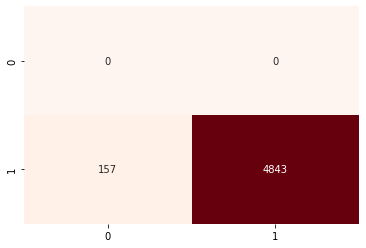


Confusion matrix for kmeans
[[   0    0]
 [1361 3639]]


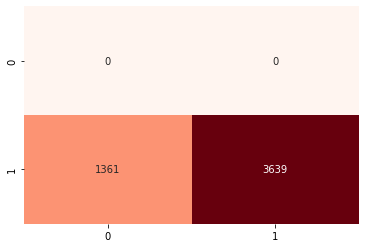


Classification Report for Hierarchial Agglomerative Clustering
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98      5000

    accuracy                           0.97      5000
   macro avg       0.50      0.48      0.49      5000
weighted avg       1.00      0.97      0.98      5000


Classification Report for kmeans
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.73      0.84      5000

    accuracy                           0.73      5000
   macro avg       0.50      0.36      0.42      5000
weighted avg       1.00      0.73      0.84      5000


REASONING: The accuracy of Hierarchial Agglomerative Clustering is way higher than that of the k-means and the f-1 score is overall higher than the k-means in Hierarchial Agglomerative Clustering. 



In [12]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report

Cluster_Compare = KMeans(2)
k_Mean_Predict = Cluster_Compare.fit_predict(df)

X_train_HAgg_pca_Whole = HAgg_clustering.fit_predict(df)

print("Confusion matrix for Hierarchial Agglomerative Clustering")
print(confusion_matrix(df.label, X_train_HAgg_pca_Whole))

ConfusionMatrix = pd.DataFrame(confusion_matrix(df.label, X_train_HAgg_pca_Whole))
sns.heatmap(ConfusionMatrix, annot = True, cmap = "Reds", fmt="d", cbar=False)
plt.show()

print("\nConfusion matrix for kmeans")
print(confusion_matrix(df.label, k_Mean_Predict))

ConfusionMatrix = pd.DataFrame(confusion_matrix(df.label, k_Mean_Predict))
sns.heatmap(ConfusionMatrix, annot = True, cmap = "Reds", fmt="d", cbar=False)
plt.show()

#  the classification Report (includes: precision, recall, f1-score, and support.
print("\nClassification Report for Hierarchial Agglomerative Clustering")
print(classification_report(df.label, X_train_HAgg_pca_Whole))
print("\nClassification Report for kmeans")
print(classification_report(df.label, k_Mean_Predict))
print("\nREASONING: The accuracy of Hierarchial Agglomerative Clustering is way higher than that of the k-means and the f-1 score is overall higher than the k-means in Hierarchial Agglomerative Clustering. \n")


###################end code for Task 3-b

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 1 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points